In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
# Generate sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [4]:
# Function to compute the cost function (Mean Squared Error)
def compute_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions - y))
    return cost

In [5]:
# Function to perform gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))

    for i in range(iterations):
        predictions = X.dot(theta)
        theta = theta - (1/m) * learning_rate * (X.T.dot(predictions - y))
        theta_history[i, :] = theta.T
        cost_history[i] = compute_cost(theta, X, y)

    return theta, cost_history, theta_history

In [6]:
# Adding x0 = 1 to each instance
X_b = np.c_[np.ones((len(X), 1)), X]  # add x0 = 1 to each instance
theta = np.random.randn(2, 1)  # random initialization of theta

In [7]:
# Hyperparameters
learning_rate = 0.1
iterations = 1000

# Performing gradient descent
theta, cost_history, theta_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

<IPython.core.display.Javascript object>


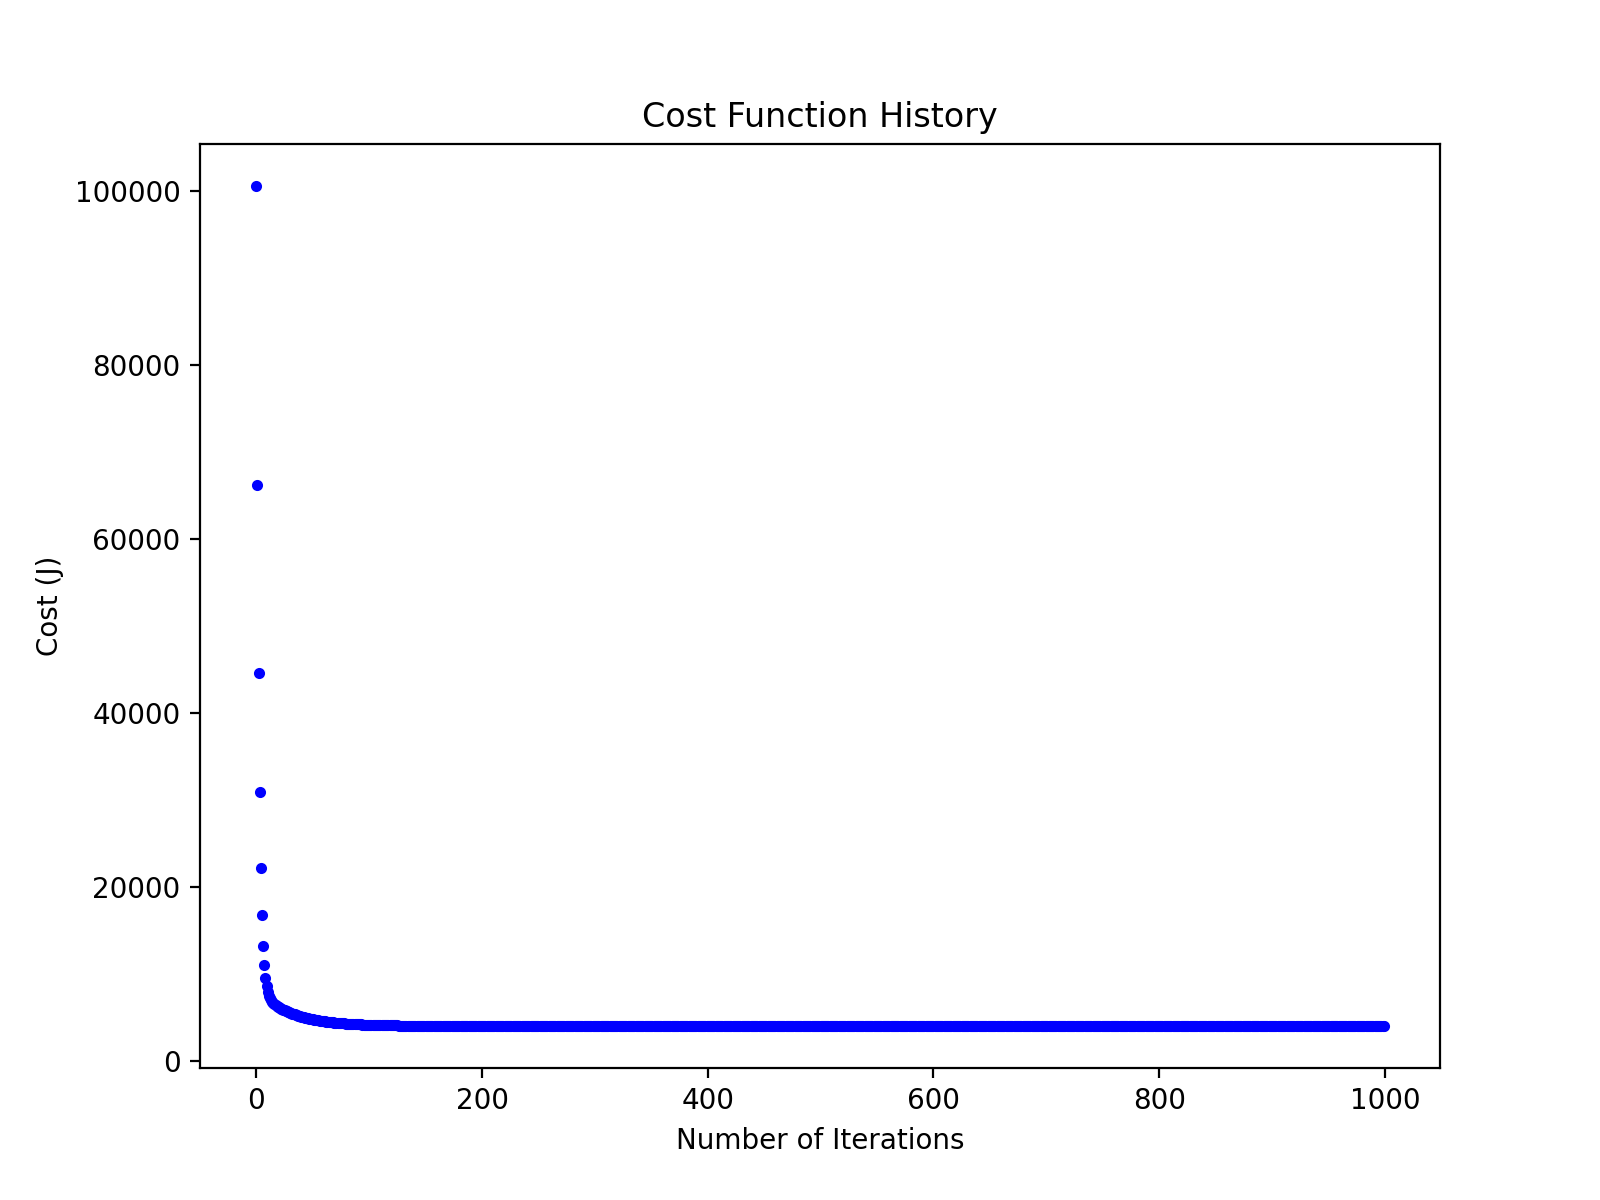

<IPython.core.display.Javascript object>


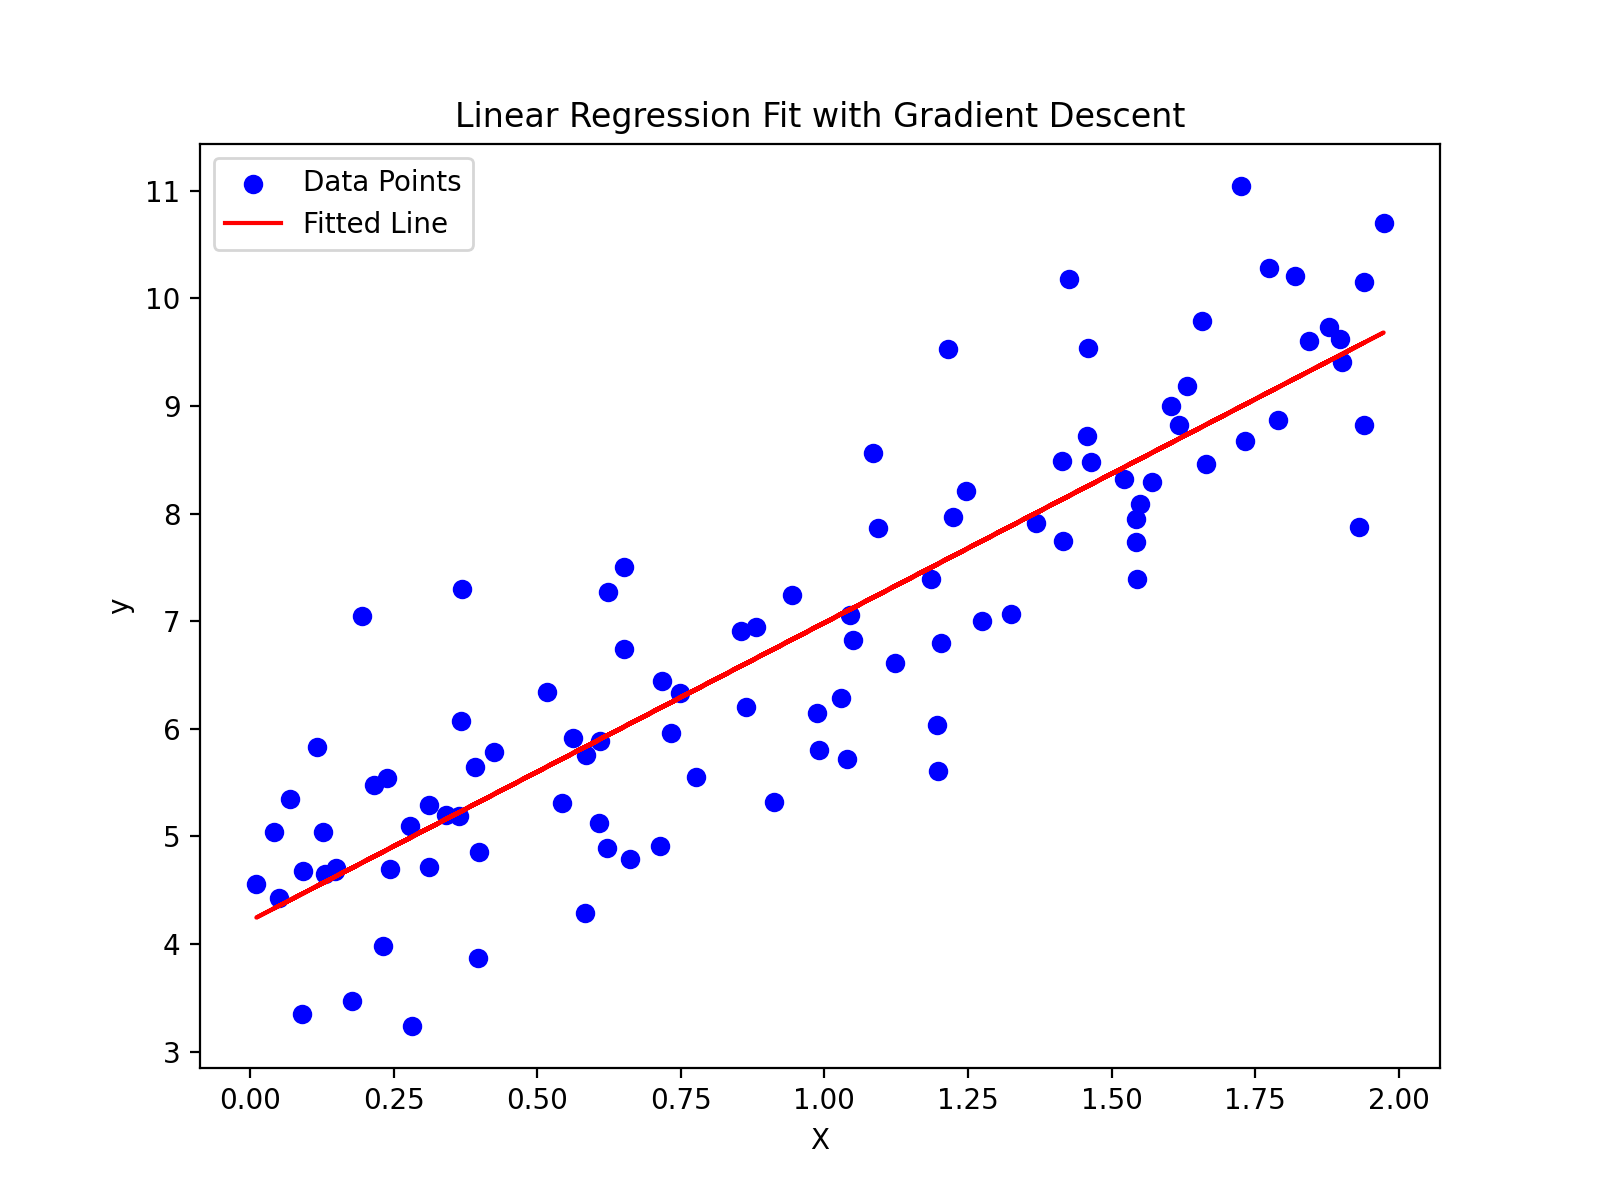

In [8]:
# Plotting the cost function history
plt.figure(figsize=(8, 6))
plt.plot(range(iterations), cost_history, 'b.')
plt.xlabel("Number of Iterations")
plt.ylabel("Cost (J)")
plt.title("Cost Function History")
plt.show()

# Plotting the data and the fitted line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, X_b.dot(theta), color='red', label='Fitted Line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit with Gradient Descent")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


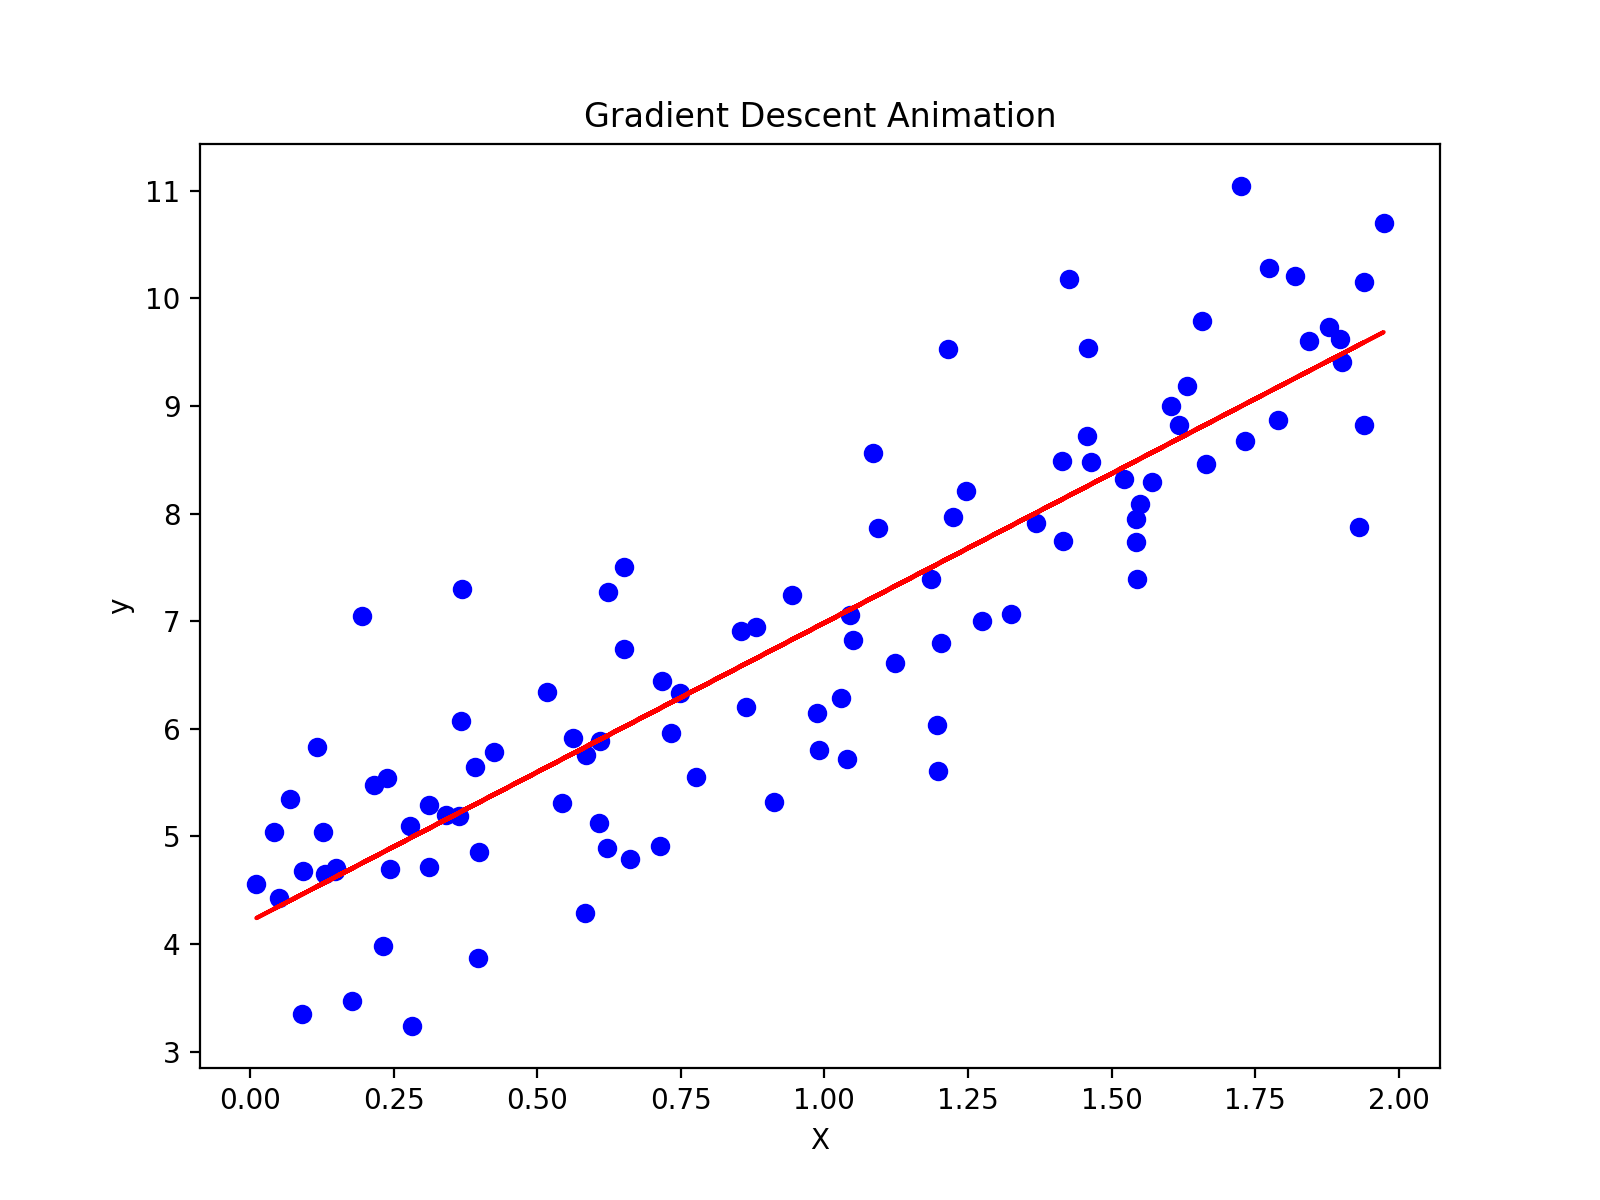

In [14]:
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X, y, color='blue')
line, = ax.plot(X, X_b.dot(theta), color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Gradient Descent Animation")

def update(num, theta_history, line):
    theta = theta_history[num]
    line.set_ydata(X_b.dot(theta))
    return line,

ani = animation.FuncAnimation(fig, update, frames=range(1, iterations, 10), fargs=[theta_history, line], blit=True)
plt.show()